## Salary_hike => Build a prediction model for Salary_hike.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\rohit\Downloads\Assignments\data science assignment\Simple Linear Regression\Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Data visualisation

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

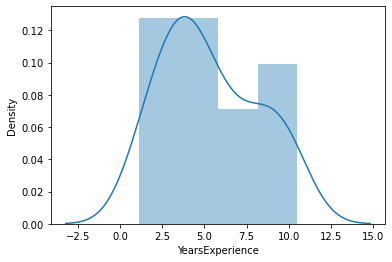

In [4]:
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

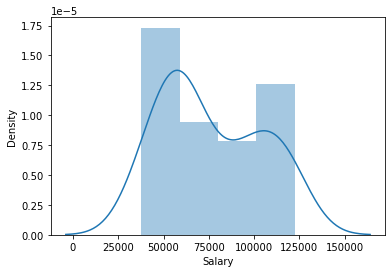

In [5]:
sns.distplot(df['Salary'])

In [6]:
print(df['YearsExperience'].skew(), df['Salary'].skew())

0.37956024064804106 0.35411967922959153


In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

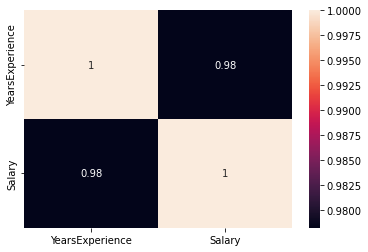

In [8]:
sns.heatmap(data=df.corr(), annot=True)

## Model building

In [9]:
import statsmodels.formula.api as smf

In [10]:
model = smf.ols('Salary~YearsExperience', data= df).fit()

In [11]:
c, m = model.params.round(1)
c, m

(25792.2, 9450.0)

## Line equation

In [12]:
x = 4.7
y = m * x + c
y

70207.2

## R2 value

In [13]:
model.rsquared

0.9569566641435086

## Prediction for new data

In [14]:
newdf = pd.Series([1,2.5,3.5,5.5,6.5,7.5,8.5,11])
newdf = pd.DataFrame(data=newdf, columns=['YearsExperience'])
newdf

,YearsExperience
0,1.0
1,2.5
2,3.5
3,5.5
4,6.5
5,7.5
6,8.5
7,11.0


In [15]:
newdf['Salary'] = model.predict(newdf).round(1)
newdf

,YearsExperience,Salary
0,1.0,35242.2
1,2.5,49417.1
2,3.5,58867.1
3,5.5,77767.0
4,6.5,87217.0
5,7.5,96666.9
6,8.5,106116.9
7,11.0,129741.8


## Data Transformation

In [16]:
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.dpi'] = 200

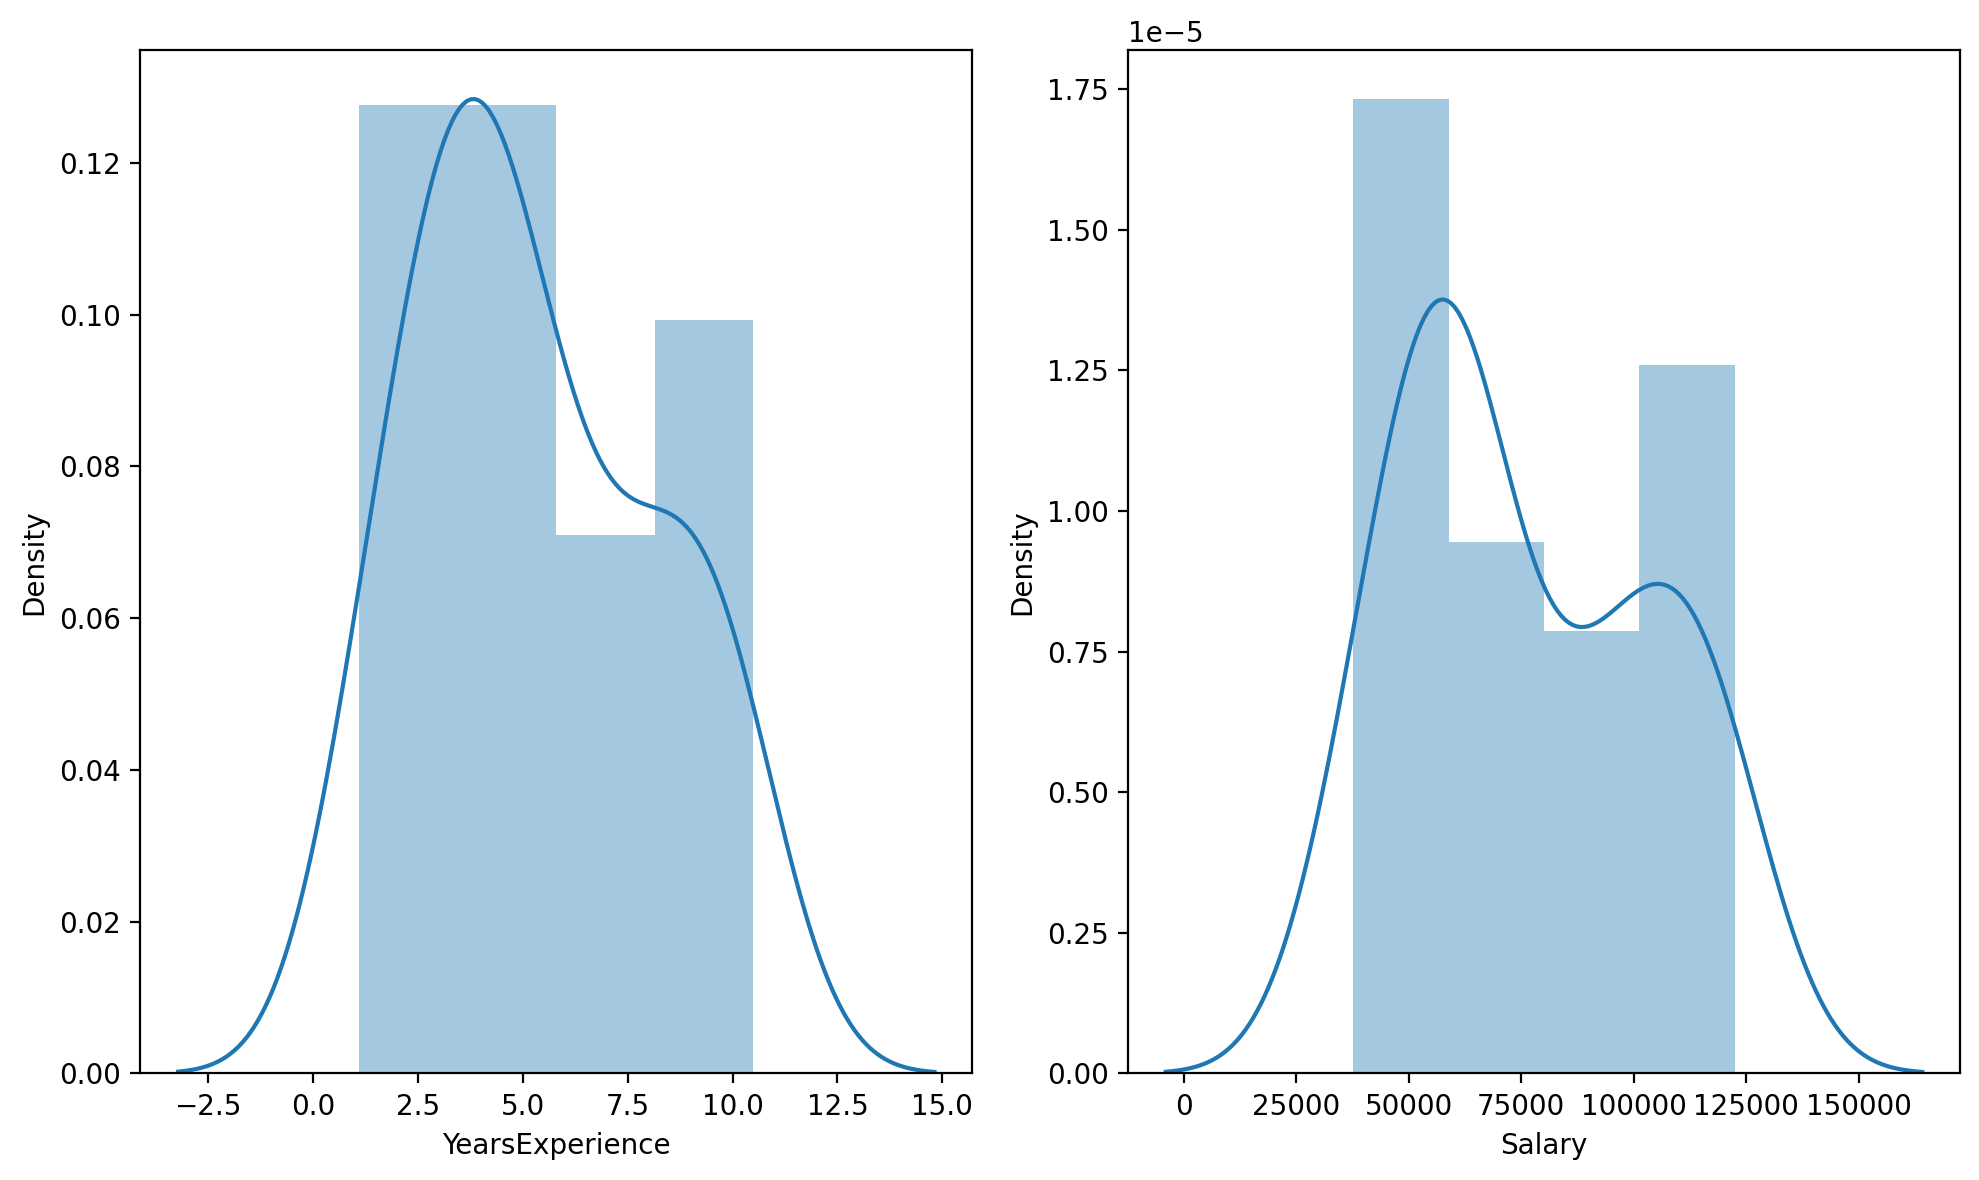

In [17]:
plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(df['Salary'])
plt.tight_layout()

In [18]:
print(df['YearsExperience'].skew(), df['Salary'].skew())

0.37956024064804106 0.35411967922959153


## Log Transformation

In [19]:
df['log_Year'] = np.log(df['YearsExperience'])
df['log_Salary'] = np.log(df['Salary'])
df.head()

,YearsExperience,Salary,log_Year,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


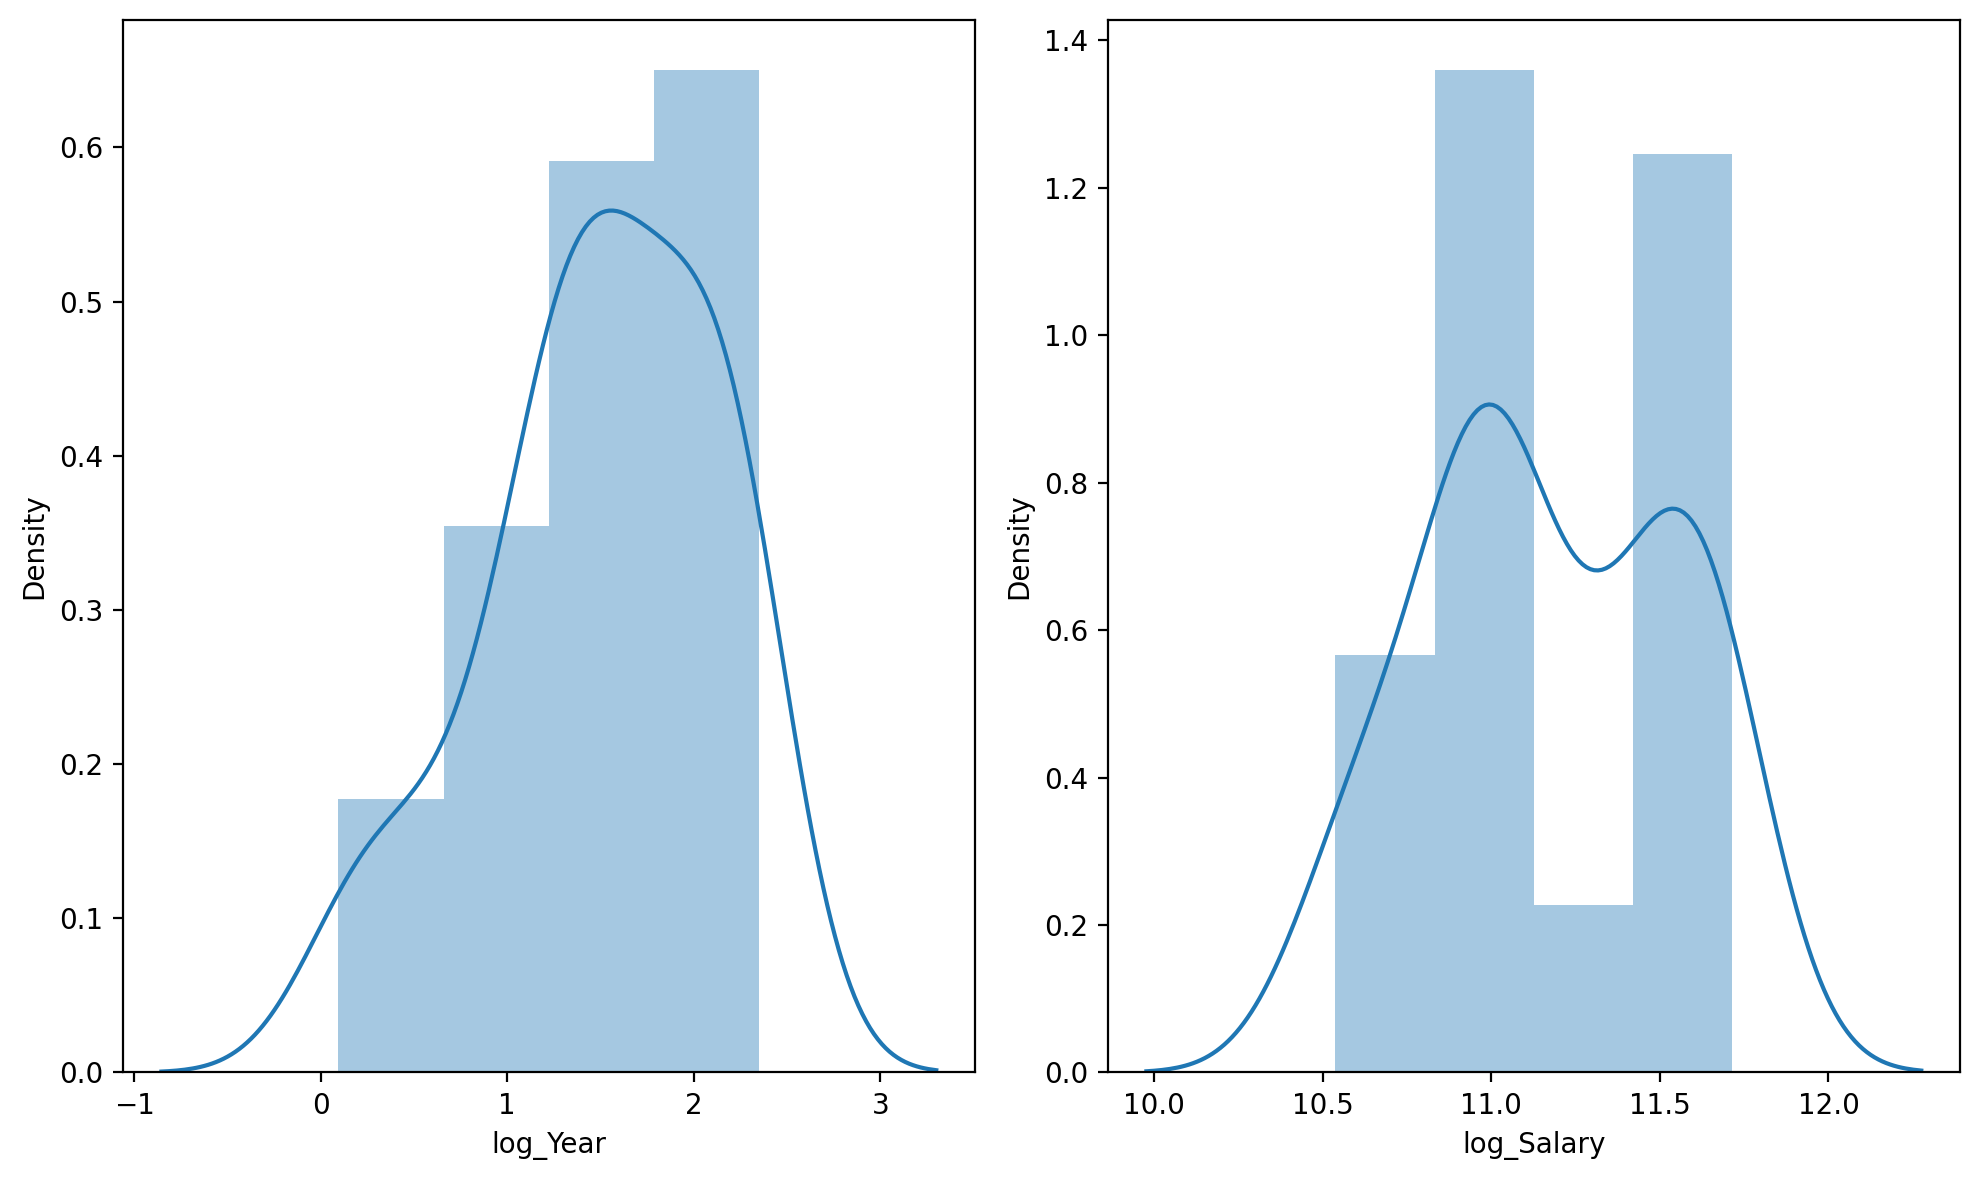

In [20]:
plt.subplot(1,2,1)
sns.distplot(df['log_Year'])

plt.subplot(1,2,2)
sns.distplot(df['log_Salary'])
plt.tight_layout()

In [21]:
print(df['log_Year'].skew(), df['log_Salary'].skew())

-0.6005648582626513 -0.044126086756988495


## Square-root Tranformation

In [22]:
df['sqrt_Year'] = np.sqrt(df['YearsExperience'])
df['sqrt_Salary'] = np.sqrt(df['Salary'])
df.head()

,YearsExperience,Salary,log_Year,log_Salary,sqrt_Year,sqrt_Salary
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314


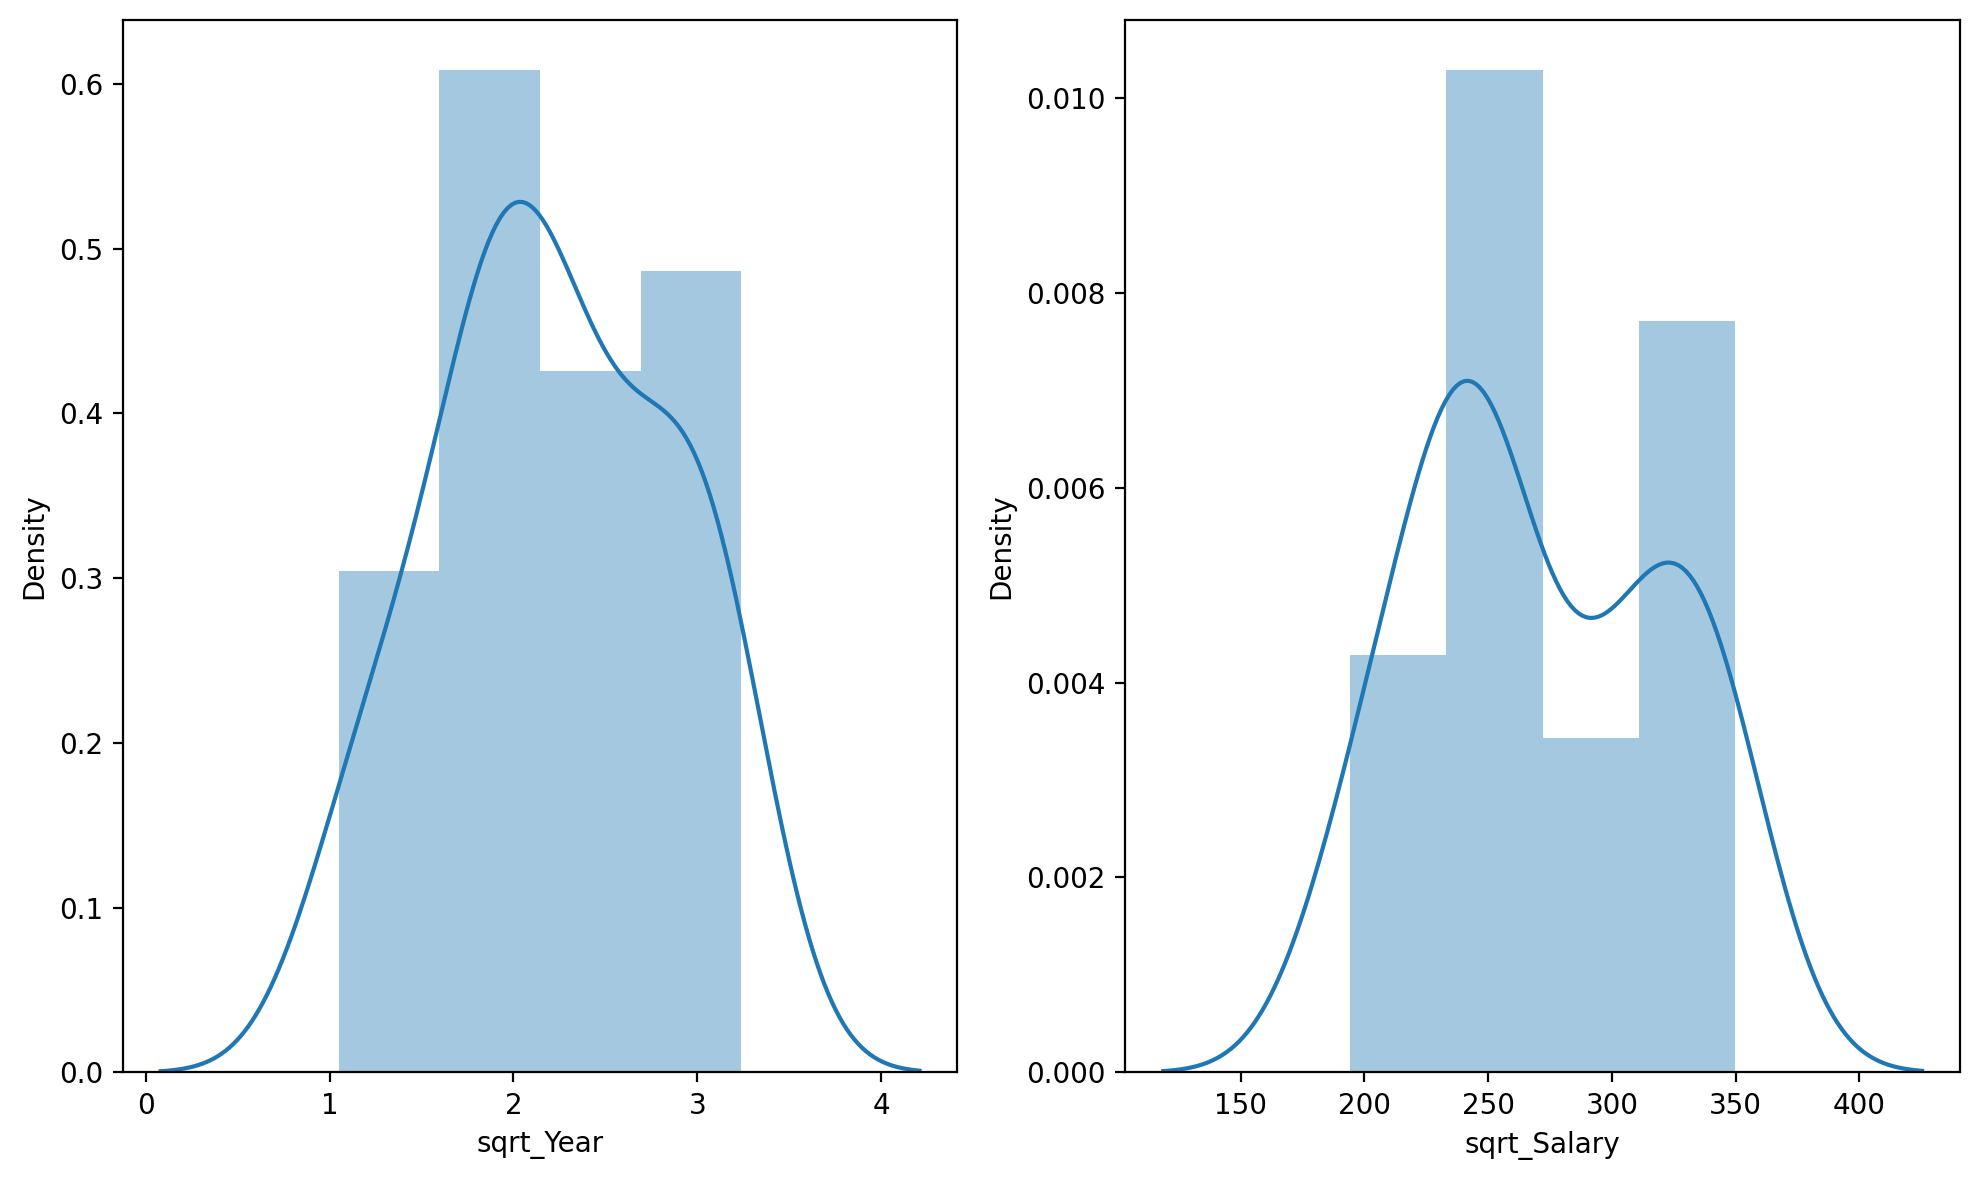

In [23]:
plt.subplot(1,2,1)
sns.distplot(df['sqrt_Year'])

plt.subplot(1,2,2)
sns.distplot(df['sqrt_Salary'])
plt.tight_layout()

In [24]:
print(df['sqrt_Year'].skew(), df['sqrt_Salary'].skew())

-0.04919608394250605 0.16904336802767353


## Square Tranformation

In [25]:
df['sq_Year'] = np.square(df['YearsExperience'])
df['sq_Salary'] = np.square(df['Salary'])
df.head()

,YearsExperience,Salary,log_Year,log_Salary,sqrt_Year,sqrt_Salary,sq_Year,sq_Salary
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700,1.21,1.547872e+09
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483,1.69,2.134902e+09
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691,2.25,1.423628e+09
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460,4.00,1.894426e+09
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314,4.84,1.591292e+09


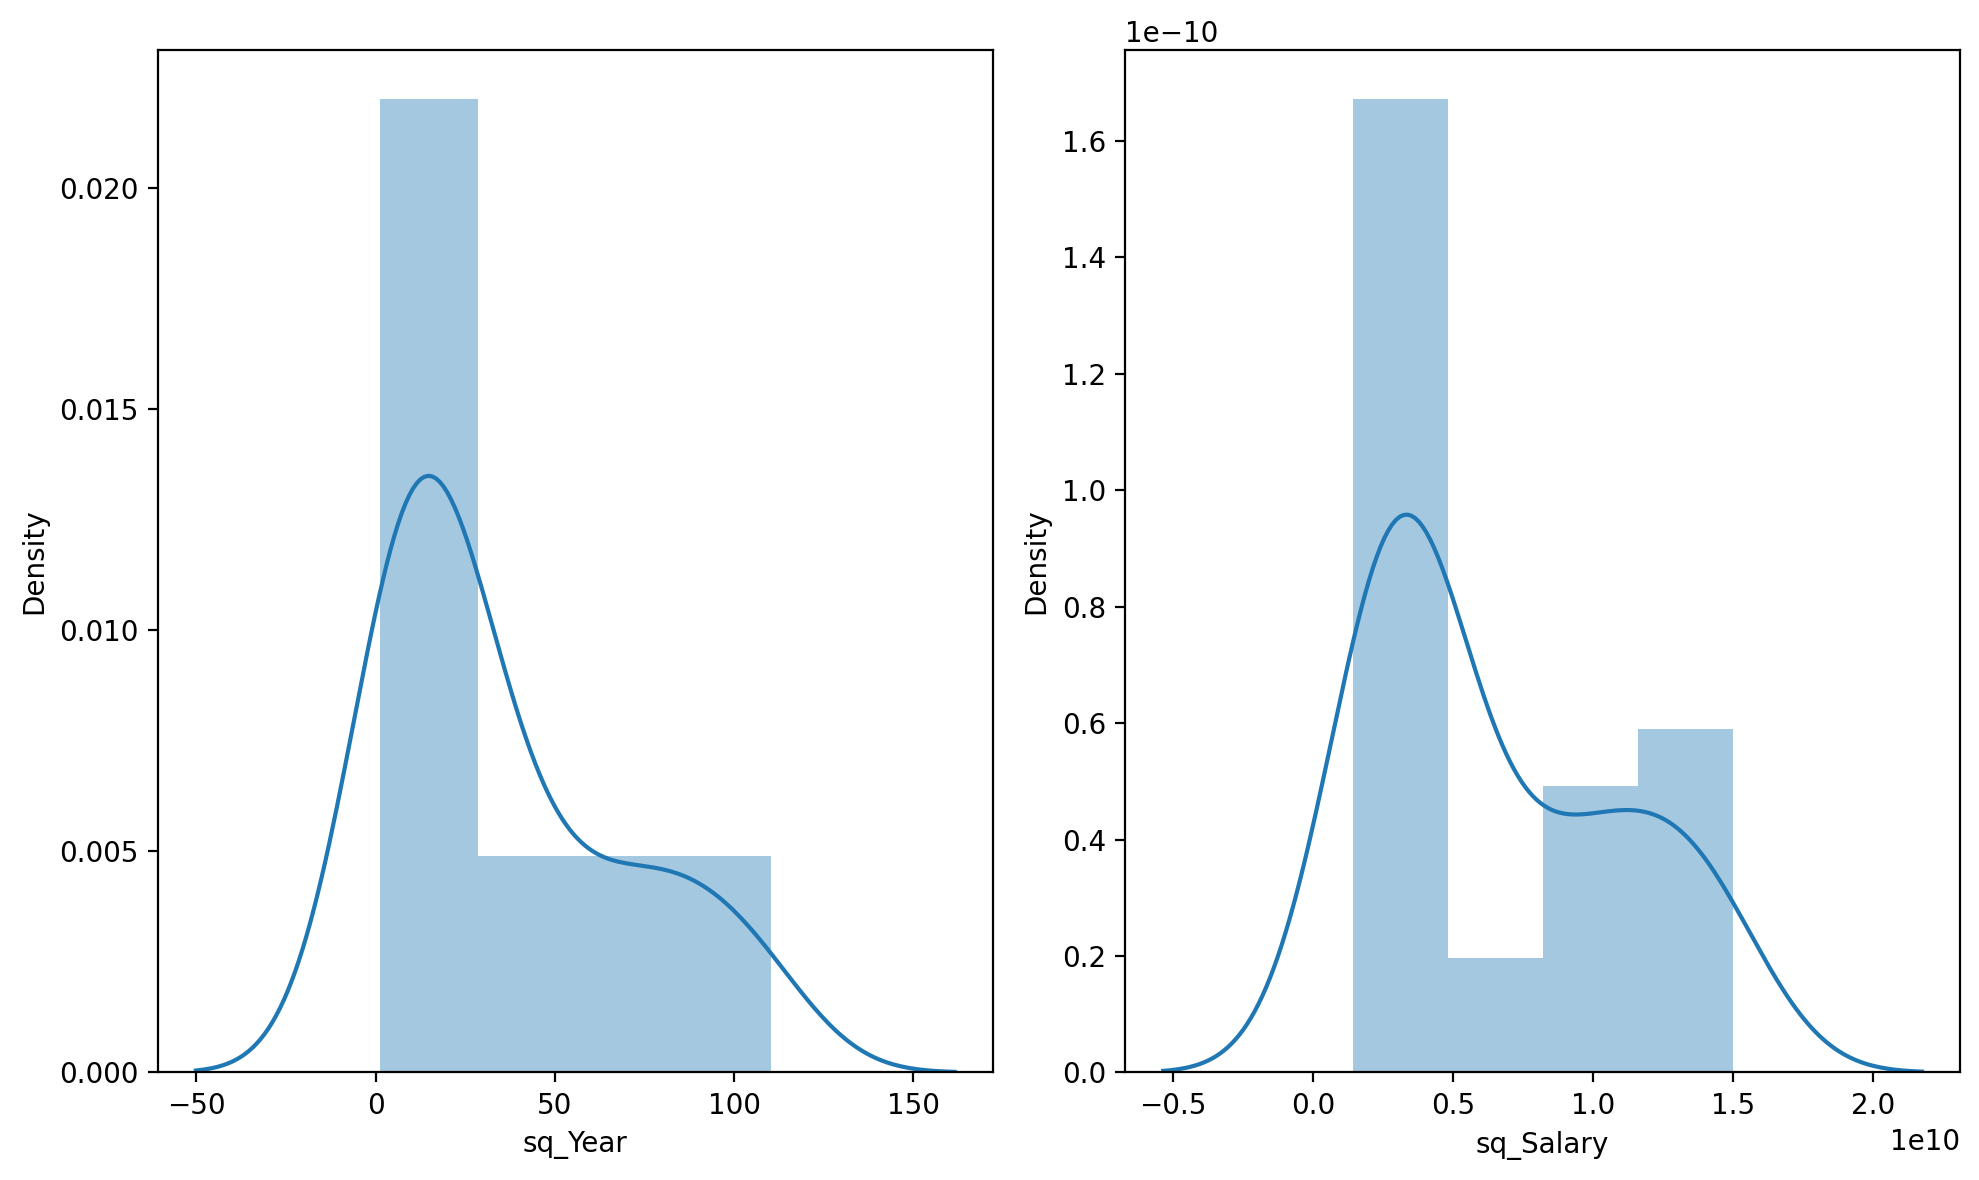

In [26]:
plt.subplot(1,2,1)
sns.distplot(df['sq_Year'])

plt.subplot(1,2,2)
sns.distplot(df['sq_Salary'])
plt.tight_layout()

In [27]:
print(df['sq_Year'].skew(), df['sq_Salary'].skew())

0.9449331187803115 0.6568711320115498
